In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [14]:
#lectura de datos
df = pd.read_csv("parkinsons_updrs.data")
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [16]:
#Resumen de cada  variable
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


In [17]:
#Identificar valores nulos
df.isna().mean()*100

subject#         0.0
age              0.0
sex              0.0
test_time        0.0
motor_UPDRS      0.0
total_UPDRS      0.0
Jitter(%)        0.0
Jitter(Abs)      0.0
Jitter:RAP       0.0
Jitter:PPQ5      0.0
Jitter:DDP       0.0
Shimmer          0.0
Shimmer(dB)      0.0
Shimmer:APQ3     0.0
Shimmer:APQ5     0.0
Shimmer:APQ11    0.0
Shimmer:DDA      0.0
NHR              0.0
HNR              0.0
RPDE             0.0
DFA              0.0
PPE              0.0
dtype: float64

In [18]:
#Eliminar valores nulos
df.dropna(inplace=True)
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


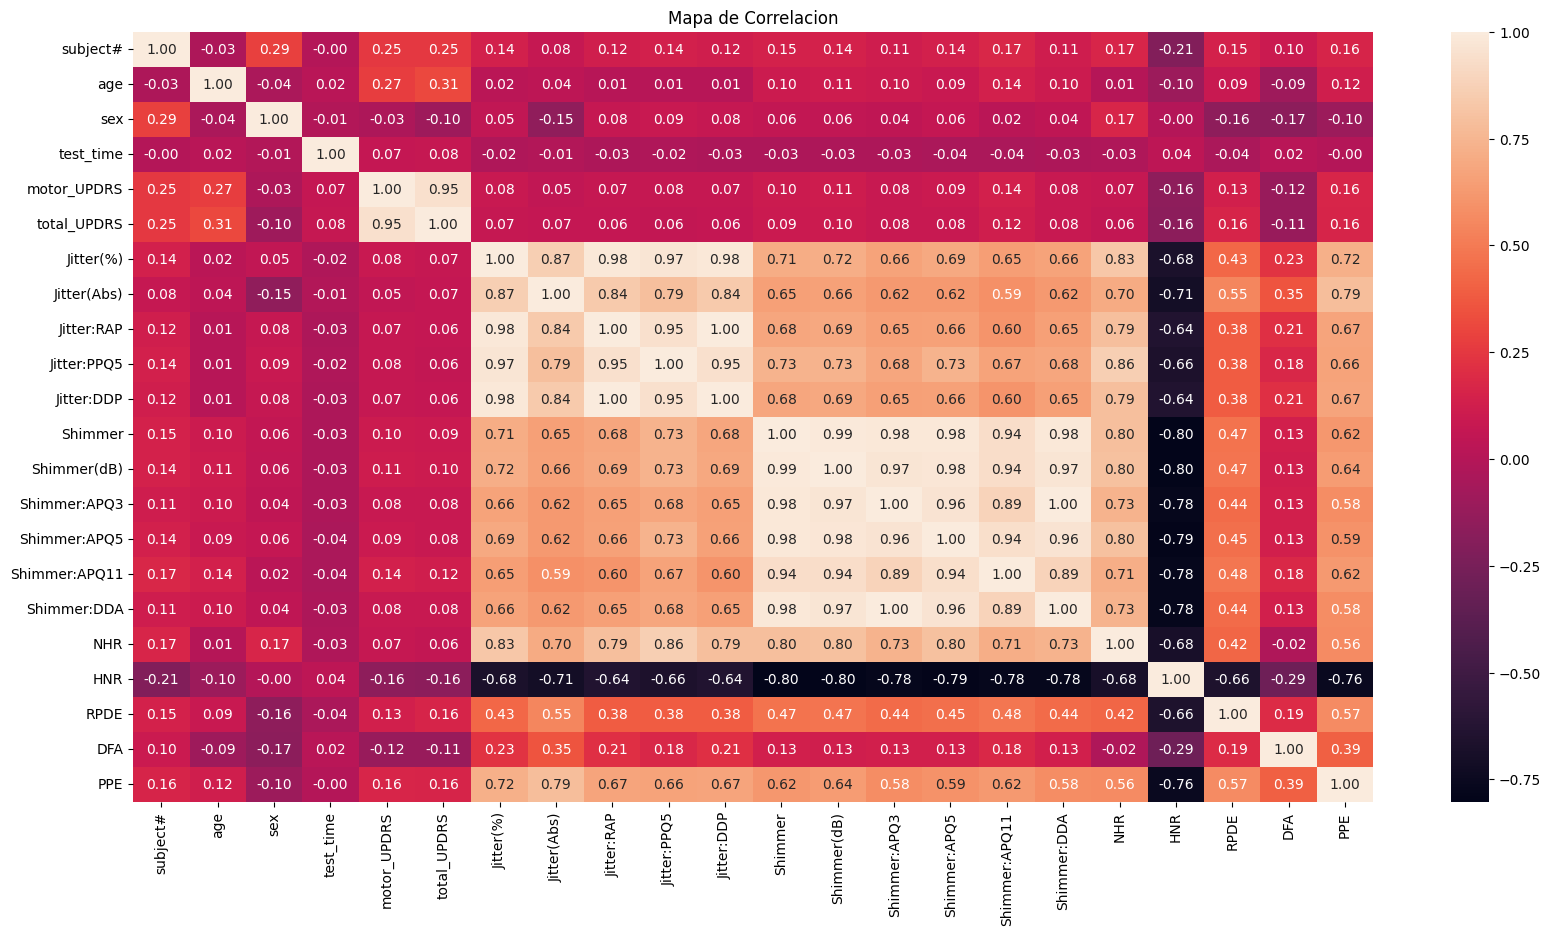

In [19]:
#Obteniedo correlacion entre las variables
numericas = df.select_dtypes(exclude='object')
matriz_correlacion = numericas.corr()

plt.figure(figsize=(20, 10))
sns.heatmap (matriz_correlacion, annot=True, fmt=".2f")
plt.title('Mapa de Correlacion')
plt.show()

**variables con alta correlación observando aquellas que presentan valores absolutos cercanos a 1**

Jitter(Abs) y Jitter(%): Correlación de 0.98.

Jitter(DPP) y Jitter(Abs): Correlación de 0.98.

Shimmer y Shimmer(dB): Correlación de 0.99.

Jitter(PPQ5) y Jitter(RAP): Correlación de 0.95.

Shimmer(APQ5) y Shimmer(APQ3): Correlación de 0.98.

Shimmer(DDA) y Shimmer(APQ11): Correlación de 0.98.

motor_UPDRS y total_UPDRS: Correlación de 0.95.

In [20]:
# #Correlacion entre variables
# sns.set(rc={'figure.figsize':(15,15)})
# sns.heatmap(round(df.corr(method='pearson', numeric_only=True),2), annot = True)
# plt.show()

#- Se observa alta correlación entre variables del mismo tipo (shimmer, jitter). Estas variables aportan poca información adicional y hará falta reducir la dimensionalidad mediante la selección de componentes principales.
#- La UPDRS parece tener correlación débil con variables como 'PPE', 'DFA', 'RPDE', 'HNR', 'Shimmer:APQ11' y 'age'.

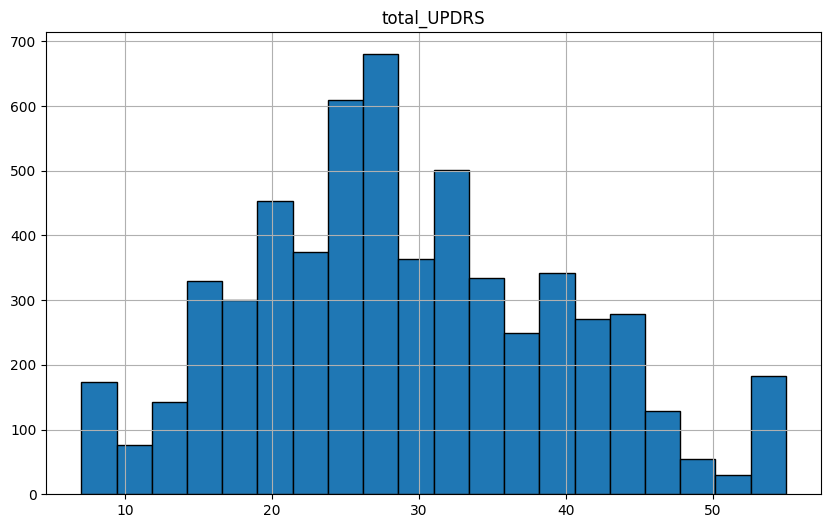

In [21]:
# Histograma para la variable 'total_UPDRS'
plt.figure(figsize=(10, 6))
df['total_UPDRS'].hist(bins=20, edgecolor='black')
plt.title('total_UPDRS')
plt.show()

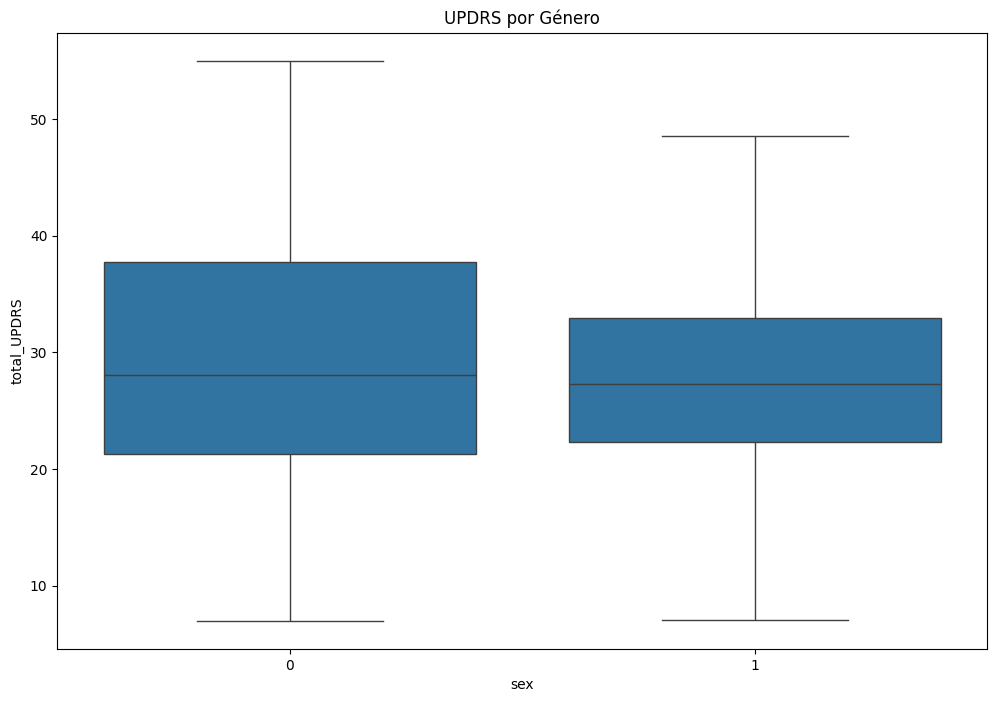

In [22]:
# Boxplots de UPDRS segun el genero
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='total_UPDRS', data=df)
plt.title('UPDRS por Género')
plt.show()

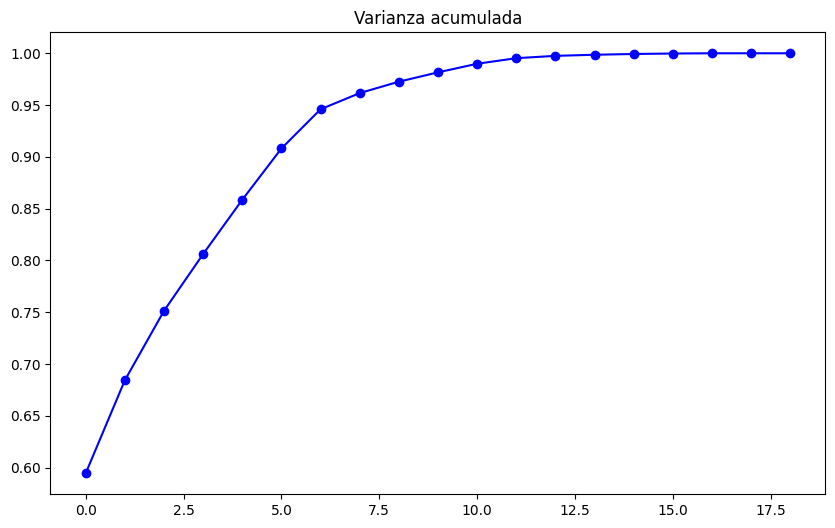

Número mínimo: 6


In [23]:
#Análisis de componentes principales

# Preprocesamiento: eliminación de filas con valores faltantes y selección de columnas numéricas
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['motor_UPDRS', 'total_UPDRS', 'sex'])
y = df['total_UPDRS']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación de PCA sin limitar el número de componentes para observar toda la varianza explicada
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cálculo de la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Determinación del número de componentes para explicar más del 90% de la varianza
num_componentes_90 = np.where(varianza_acumulada >= 0.9)[0][0] + 1

# Gráfica de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(varianza_acumulada, marker='o', linestyle='-', color='blue')
plt.title('Varianza acumulada')
plt.show()

# Impresión de resultados
print(f"Número mínimo: {num_componentes_90}")

- Los primeros 6 componentes principales explican el 90% de la varianza.

ENTRENAMIENTO Y MODELADO

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
import mlflow

import logging

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return mae, r2

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

# Eliminar filas con valores nulos
df = pd.read_csv("parkinsons_updrs.data")
df = df.dropna()

'''
Columnas altamente correlacionadas (con un umbral de correlación mayor a 0.9) y, por lo tanto, 
son candidatas para ser eliminadas del dataset:
total_UPDRS
Jitter:RAP
Jitter:PPQ5
Jitter:DDP
Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
Shimmer:APQ11
Shimmer:DDA
'''

# Lista de columnas altamente correlacionadas
correlated_cols = []
for col in X:
    if 'total_UPDRS' in col or 'Jitter:RAP' in col or 'Jitter:PPQ5' in col or 'Jitter:DDP' in col or 'Shimmer(dB)' in col or 'Shimmer:APQ3' in col or 'Shimmer:APQ5' in col or 'Shimmer:APQ11' in col or 'Shimmer:DDA' in col:
        correlated_cols.append(col)

# Crear un ColumnTransformer para eliminar las columnas correlacionadas
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_correlated_cols', 'drop', correlated_cols)
    ],
    remainder='passthrough'  # Mantener el resto de las variables
)

# Eliminar las columnas con alta correlación
df = df.drop(columns=correlated_cols)

# Separar las características (X) y la variable objetivo (y)
X = df.drop(['motor_UPDRS'], axis=1)
y = df['total_UPDRS']

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(f"/user/Parkinson")

with mlflow.start_run() as run:
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Estandarización de los datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Entrenar un modelo de Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbr_model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = gbr_model.predict(X_test)

    # Evaluar el rendimiento del modelo
    r2 = r2_score(y_test, y_pred)
    (mae, r2) = eval_metrics(y_test, y_pred)

    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_param("max_depth", 3)
    mlflow.log_param("random_state", 42)

    # Log the model
    mlflow.sklearn.log_model(gbr_model, "model")    

    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)
    

2024/10/19 14:55:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/19 14:55:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run thoughtful-moth-157 at: http://localhost:5000/#/experiments/2/runs/448b51d3648943e0adebcdfb964d1782.
2024/10/19 14:55:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/2.


  MAE: 0.05951301871404093
  R2: 0.9999418685482216


El Gradient Boosting Regressor parece estar funcionando muy bien para el conjunto de datos con el que está entrenado y probado. Los indicadores clave que mencionas, como el R² y el MSE, reflejan un rendimiento robusto del modelo:

Un R² de 0.999 implica que el modelo está capturando aproximadamente el 93.9% de la variación en los datos de salida.

Un MSE bajo (Error Cuadrático Medio) refuerza este rendimiento, sugiriendo que los errores en las predicciones del modelo son pequeños en promedio.

In [25]:
import mlflow
logged_model = 'runs:/448b51d3648943e0adebcdfb964d1782/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

d:\DevOps\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


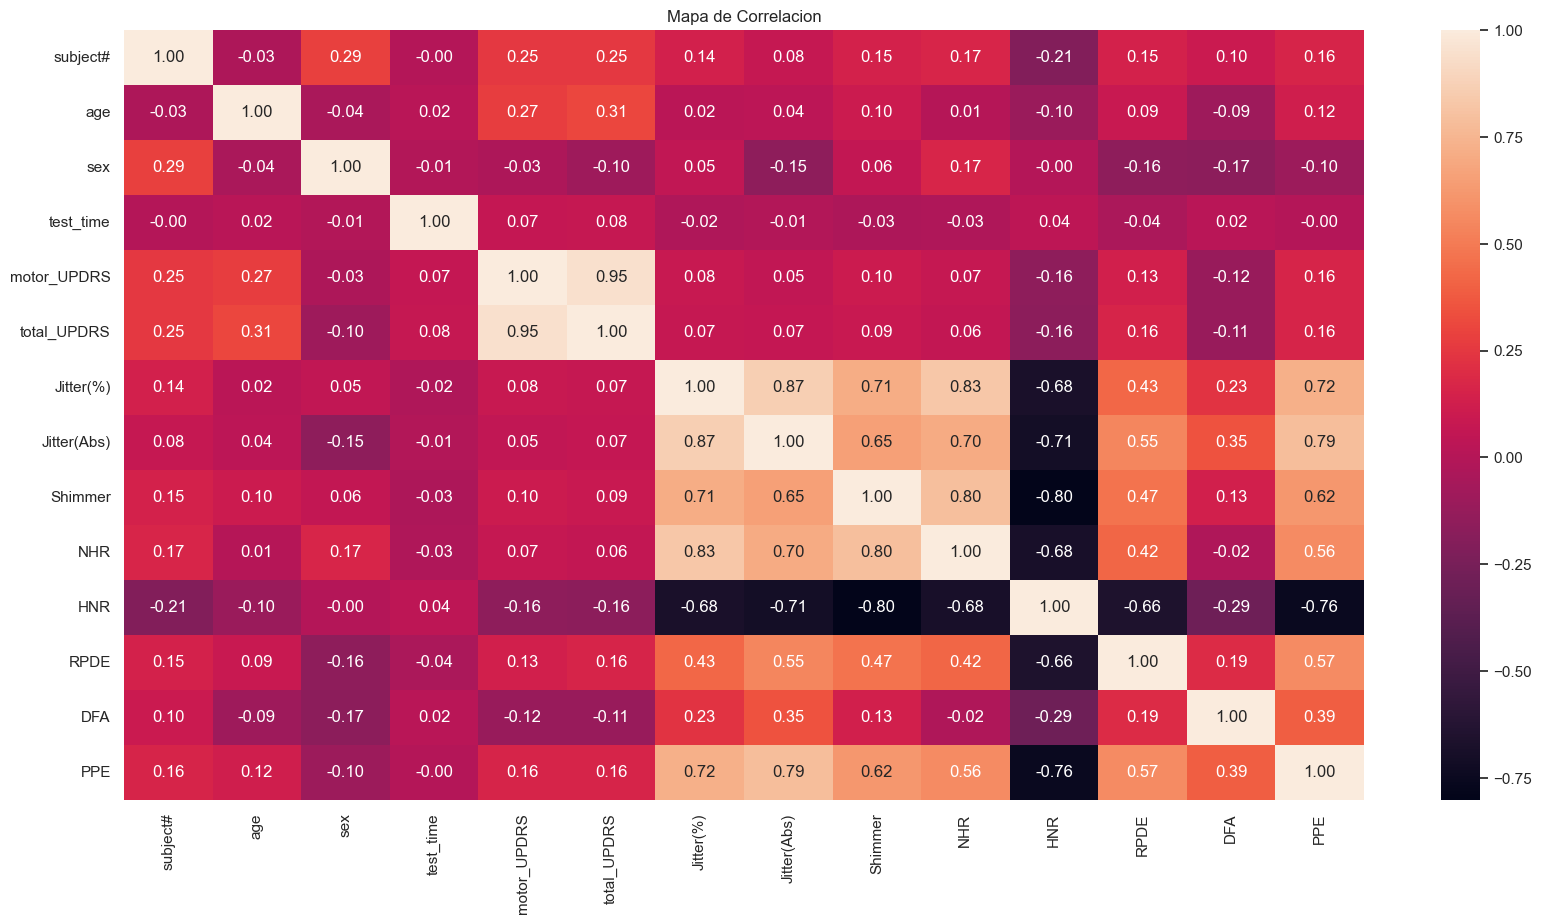

In [190]:
#Mapa de calor sin columnas con alta correlacion
numericas = df.select_dtypes(exclude='object')
matriz_correlacion = numericas.corr()

plt.figure(figsize=(20, 10))
sns.heatmap (matriz_correlacion, annot=True, fmt=".2f")
plt.title('Mapa de Correlacion')
plt.show()